# <center> <span style="color:#f26a81">CP321 Final Project</span></center> 
***
#### <center> Data Visualization </center> 
#### <center>Dr. Jiashu (Jessie) Zhao </center> 
#### <center>Winter 2024 </center>
 #### <center>Authors: Anousheh Shahid (210179080), Maham Farooq (200498180), Razan Mohamed (169035150)</center>





# <center> <span style="color:#f26a81">Introduction and Motivation</span></center> 
***
During the COVID-19 pandemic, vaccinations were a crucial weapon in safeguarding public health. As vaccination efforts still progress to this day, it's important to understand how effective these vaccines are in preventing cases across multiple age groups. Our project focuses on understanding the relationship between vaccination rates and COVID-19 cases within specific age groups in Ontario, Canada.

Our motivation for this study came from the curiosity of understanding how effective these vaccination campaigns were throughout the pandemic. While many vaccines were distributed across Ontario, the number of doses taken varied across age groups. This raised the question of how effective these vaccines were in battling the COVID-19 pandemic. By comparing two data sets about confirmed positive COVID-19 cases and vaccination rates among different age cohorts, we want to find out whether there is a connection between higher vaccination rates and a decrease in COVID-19 cases within the same age group.

We believe our findings will be very useful for Public Health Ontario and the general public in knowing how important vaccinations are. If there is a strong correlation between vaccination rates and reduced COVID-19 cases within specific age groups, it would prove the effectiveness of vaccination campaigns. If there is no correlation, then this would force Public Health Ontario to come up with a better solution in combating COVID-19. Through data visualization and quantitative analysis, we aspire to provide key insights in the fight against COVID-19 in Ontario.


# <center> <span style="color:#f26a81">Methodology</span></center> 
***
 Propose Approach (your question, data set description,
data processing, Visualization Description and Analysis)
### Question: 
Is there a correlation between COVID-19 vaccination rates and COVID-19 cases amongst different age cohorts?
### Data set description: 
Two datasets are used in this study 

### Data Processing




Positive COVID-19 Cases over Time Dataset source: Government of Ontario https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350 

Vaccination rates by age over Time Dataset source: Government of Ontario

In [72]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Preprocessing the first dataset

#load the first dataset
df = pd.read_csv('vaccines_by_age.csv')


#Filter the data by date range
start_date = '2021-01-01'
end_date = '2024-03-01'

df['Date'] = pd.to_datetime(df['Date'])  
m = (df['Date'] > start_date) & (df['Date'] <= end_date)
df = df.loc[m]
#Remove incomplete/unclear values and filter the age range
df = df.drop(df[(df['Agegroup'] == 'Undisclosed_or_missing') | (df['Agegroup'] == 'Adults_18plus') | (df['Agegroup'] == 'Ontario_12plus') |(df['Agegroup'] == 'Ontario_5plus')| (df['Agegroup'] == '05-11yrs')  | (df['Agegroup'] == '12-17yrs')  | (df['Agegroup'] == '18-29yrs')].index)
#Group by age

df.head(20)

#--------------------------------------------------------------------------
#Preprocessing the Second Dataset 

#load the second dataset
df2 = pd.read_csv('conposcovidloc.csv')

#Filter the data by date range
df2['Case_Reported_Date'] = pd.to_datetime(df2['Case_Reported_Date'])  
m = (df2['Case_Reported_Date'] > start_date) & (df2['Case_Reported_Date'] <= end_date  ) & (df2['Accurate_Episode_Date'] > start_date)  
df2 = df2.loc[m]
#Remove incomplete values and filter the age range
df2 = df2.drop(df2[(df2['Case_Reported_Date'] == 'NaN') |(df2['Age_Group'] == '<20') |(df2['Age_Group'] == '20s')].index)
df2.head(15)

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome1,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
206612,206613,2021-01-02,2021-01-02,NaN,NaN,40s,MALE,NaN,2240,Chatham-Kent Health Unit,435 Grand Avenue West,Chatham,N7M 5L8,www.ckphu.com,42.403861,-82.208561
206613,206614,2021-01-02,2021-01-02,NaN,NaN,50s,FEMALE,NaN,2258,Eastern Ontario Health Unit,1000 Pitt Street,Cornwall,K6J 5T1,www.eohu.ca,45.029152,-74.736298
206614,206615,2021-01-02,2021-01-02,NaN,2021-01-02,30s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
206615,206616,2021-01-02,2021-01-02,NaN,2021-01-02,50s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
206616,206617,2021-01-02,2021-01-02,NaN,2021-01-11,30s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
206617,206618,2021-01-02,2021-01-02,2020-12-30,NaN,70s,MALE,NaN,2268,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670
206619,206620,2021-01-02,2021-01-02,2021-01-02,2020-12-31,40s,FEMALE,NaN,2262,Thunder Bay District Health Unit,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
206626,206627,2021-01-02,2021-01-02,2021-01-02,2021-01-02,30s,FEMALE,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
206627,206628,2021-01-02,2021-01-02,2021-01-02,2021-01-02,30s,MALE,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
206628,206629,2021-01-02,2021-01-02,2021-01-02,2021-01-02,30s,MALE,NaN,2243,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833


# Time Series of COVID-19 Cases Based on Age and Vaccination Rates

<Figure size 1200x600 with 0 Axes>

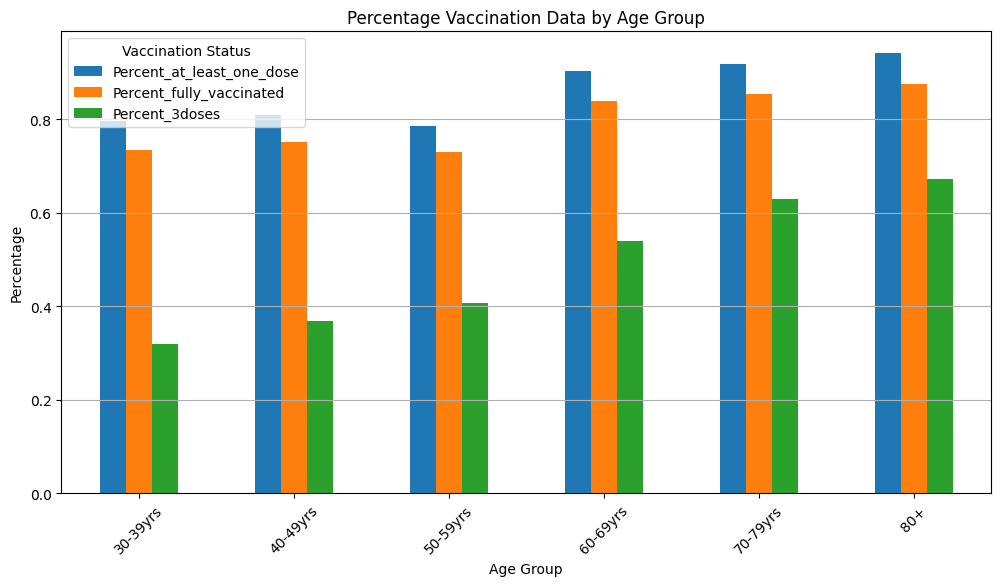

In [71]:
df = df.sort_values('Date')
plt.figure(figsize=(12, 6))

df['Date'] = pd.to_datetime(df['Date'])
percentage_data = df.groupby('Agegroup')[['Percent_at_least_one_dose', 'Percent_fully_vaccinated', 'Percent_3doses']].mean()

# Plot bar plot for percentage vaccination data
percentage_data.plot(kind='bar', figsize=(12, 6))


plt.title('Percentage Vaccination Data by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status')
plt.grid(axis='y')
plt.show()

# <center> <span style="color:#f26a81">Conclusion</span></center> 
***